In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
from jupyterthemes import jtplot
jtplot.reset()

### LINEARITA PREAMPLIFICATORE - FIT LINEARE Vmax vs Qin

In [2]:
# READ DATA
file = '../Data/PreAmp/data_linearita.txt'

data = pd.read_csv(file, sep = '   ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['T', 'V']

R = 56564 # Ohm
S = 1.018 # Volt

data['T'] = data['T'] * 1e-6
data['Q'] = 1e12 * data['T'] * S / R 

data

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [6]:
# LINEAR FUCTION
def lin(x, a, b):
    return a + b * x

In [7]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data['Q'], ydata = data['V'])
func = lin(data['Q'], *par_lin)

# PLOT DATA
ax1.errorbar(data['Q'],data['V'], xerr = 0, yerr = 0, marker = '.', markersize = 15,
             elinewidth=0.5, color = '#000000', linewidth=0, capsize=2, label = 'Data')

# PLOT FIT FUNCTION
ax1.plot(data['Q'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

# PLOT TITLE
ax1.set_title('PreAmp - Preliminary Vmax vs Qin Plot', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('Qin (pC)', fontsize = 26, loc = 'right')
ax1.set_ylabel('Vmax (V)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
#ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
#ax1.xaxis.get_offset_text().set_fontsize(22)
#ax1.ticklabel_format(axis = 'x', style = 'scientific', scilimits = (0, 0))

# PLOT RANGE
ax1.set_xlim(left = 30, right = 185)
ax1.set_ylim(bottom = .12, top = .82)

# SAVE FIGURE
fig.savefig('../Logbook/logbook_Vmax_Qin.png', dpi = 300)

plt.show()

KeyError: 'Q'

### ARDUINO - TEMPO CARATTERISTICO

In [8]:
# READ DATA
file = '../Data/Shaper/shaper_data_ROOT.dat'

data = pd.read_csv(file, sep = ' ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']
data

,time,ADC
1,1,992
2,2,992
3,3,994
4,4,994
5,5,994
...,...,...
2043,2043,902
2044,2044,870
2045,2045,839
2046,2046,816


In [35]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time'], data['ADC'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('Shaper Base - Preliminary Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (a.u.)', fontsize = 26, loc = 'right')
ax1.set_ylabel('ADC (a.u.)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 500, right = 1000)
ax1.set_ylim(bottom = 980, top = 1320)

# SAVE FIGURE
#fig.savefig('../Logbook/shaper_base_arduino_waveform.png', dpi = 300,facecolor = 'white')

plt.show()

KeyError: 'time'

### RISPOSTA IN FREQUENZA - BODE PLOT

In [10]:
# READ DATA
file = '../Data/Shaper/data_bode.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['f', 'Vin', 'Vout']

T = data['Vout'] / data['Vin']
data['T'] = T

data['f'] = np.log10(data['f'])
data['T'] = 20 * np.log10(data['T'])

data

,f,Vin,Vout,T
1,1.698970,1.02,0.0056,-45.208243
2,2.000000,1.02,0.0104,-39.831337
3,2.397940,1.02,0.0248,-32.282970
4,2.698970,1.02,0.0488,-26.403607
5,3.000000,1.02,0.0960,-20.526579
6,3.301030,1.02,0.1860,-14.781745
7,3.477121,1.02,0.2660,-11.674371
8,3.602060,1.02,0.3320,-9.749242
9,3.698970,1.02,0.3840,-8.485379
10,3.778151,1.02,0.4200,-7.707018


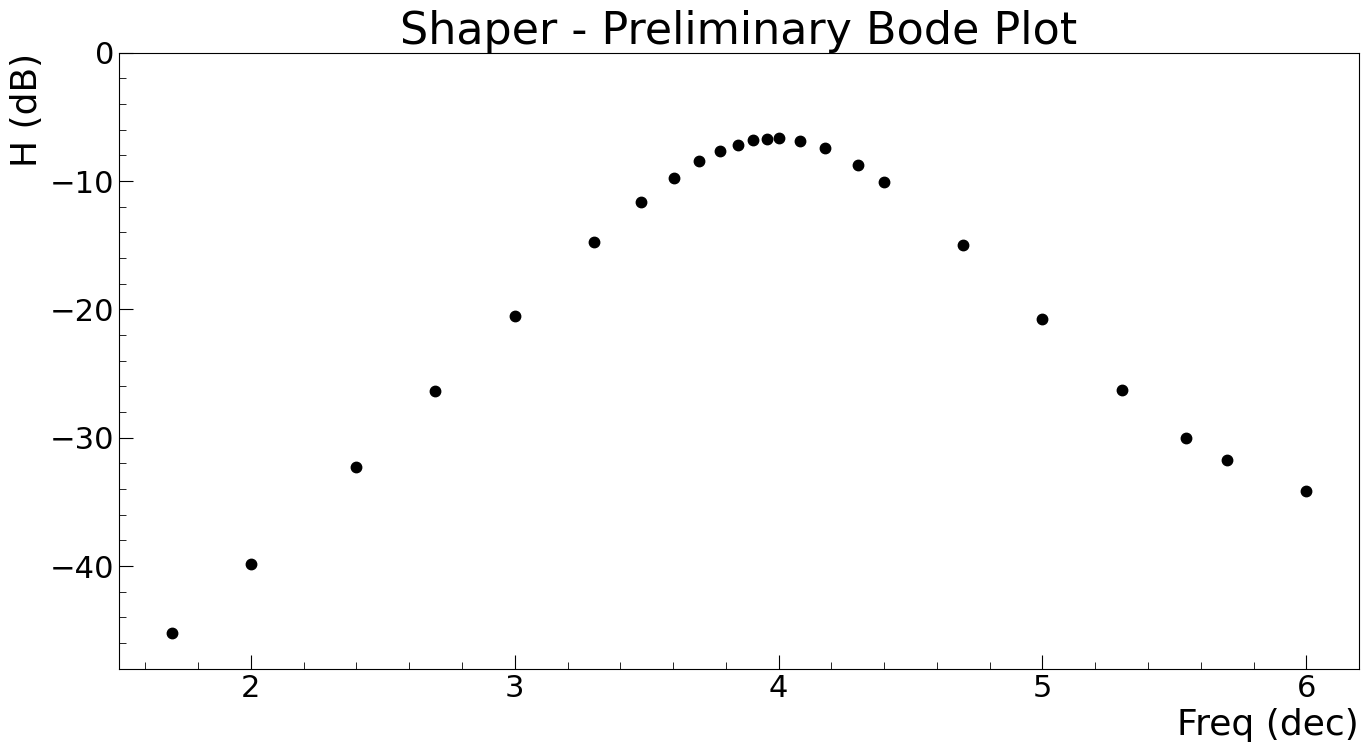

In [11]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FITS
# par1, cov1 = curve_fit(f = lin, xdata = data1['f'], ydata = data1['T'], p0=[20, 0])
# func1 = lin(data['f'], *par1)
# 
# par2, cov2 = curve_fit(f = lin, xdata = data2['f'], ydata = data2['T'])
# func2 = lin(data['f'], *par2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
# error1 = []
# error2 = []
# 
# for i in range(len(par1)):
#     try:
#         error1.append(np.absolute(cov1[i][i])**0.5)
#     except:
#         error1.append( 0.00 )
# 
# for i in range(len(par2)):
#     try:
#         error2.append(np.absolute(cov2[i][i])**0.5)
#     except:
#         error2.append( 0.00 )
# 
# fit_par1 = par1
# fit_err1 = np.array(error1)
# 
# fit_par2 = par2
# fit_err2 = np.array(error2)
# 
# a = fit_par1[0]
# b = fit_par1[1]
# err_a = fit_err1[0]
# err_b = fit_err1[1]
# 
# c = fit_par2[0]
# d = fit_par2[1]
# err_c = fit_err2[0]
# err_d = fit_err2[1]
# 
# # COMPUTE X AND Y INTERSECTION
# x_int = (c - a) / (b - d)
# y_int = lin(x_int, *par1)

# PLOT DATA
ax1.plot(data['f'], data['T'], color = '#000000', linewidth = 0, marker = '.', markersize = 15, label = 'Data')

# PLOT FIT FUNCTIONS
# ax1.plot(data['f'], func1, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit1')
# ax1.plot(data['f'], func2, color = '#00b4ff', linewidth = 2, linestyle = 'dashed', label = 'Fit2')

# DRAW INTERSECTION LINE
#ax1.vlines(x = x_int, ymin = -40, ymax = y_int, color = '#000000', linestyle = 'dotted')

# PLOT TITLE
ax1.set_title('Shaper - Preliminary Bode Plot', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('Freq (dec)', fontsize = 26, loc = 'right')
ax1.set_ylabel('H (dB)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 1.5, right = 6.2)
ax1.set_ylim(bottom = -48, top = 0)

# SAVE FIGURE
fig.savefig('../Logbook/shaper_bode.png', dpi = 300)

plt.show()

# CATENA ELETTRONICA

***

## Compensazione Pole Zero

### SENZA RPZ:

In [12]:
# READ DATA
file = '../Data/Shaper/norpz_arduino7_ROOT.dat'

data = pd.read_csv(file, sep = ' ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']
data

,time,ADC
1,1,1026
2,2,1025
3,3,1026
4,4,1026
5,5,1026
...,...,...
2043,2043,1026
2044,2044,1025
2045,2045,1026
2046,2046,1025


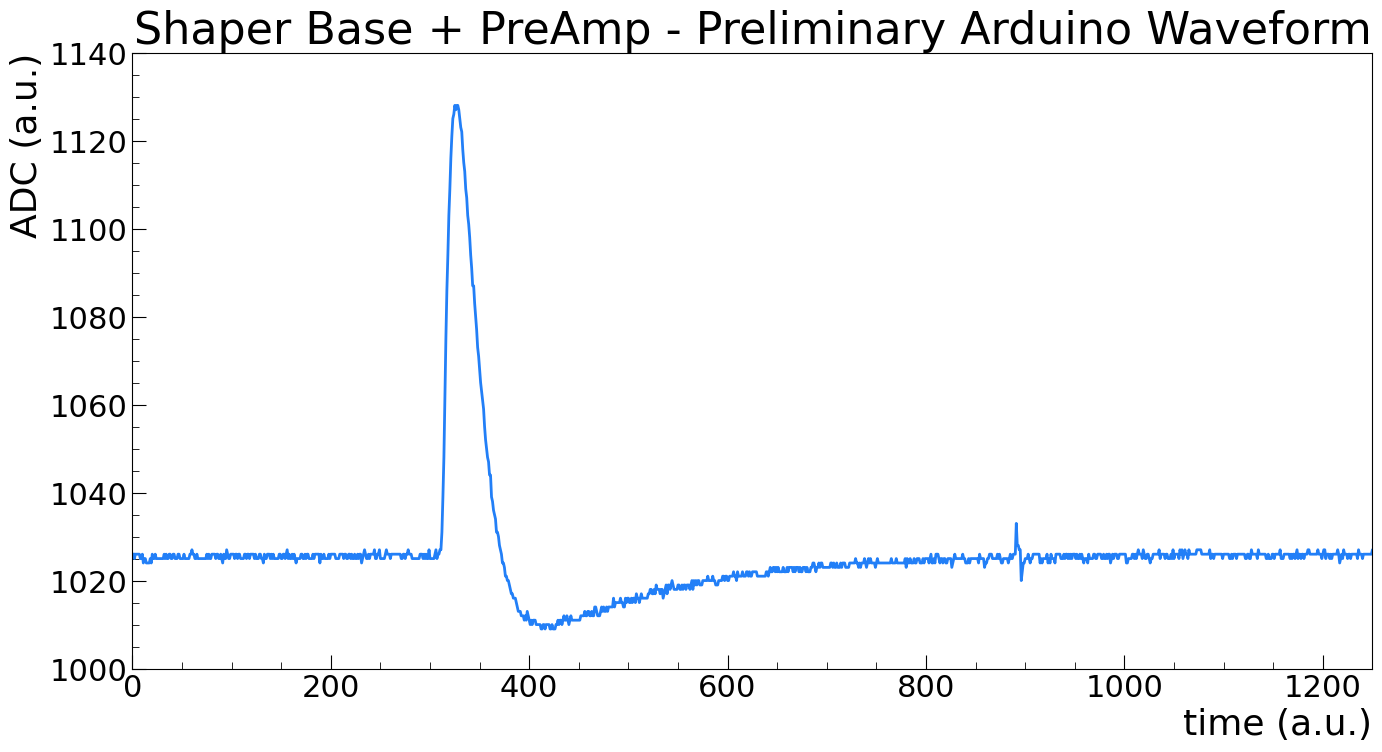

In [13]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time'], data['ADC'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('Shaper Base + PreAmp - Preliminary Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (a.u.)', fontsize = 26, loc = 'right')
ax1.set_ylabel('ADC (a.u.)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 1250)
ax1.set_ylim(bottom = 1000)

# SAVE FIGURE
#fig.savefig('../Logbook/shaper_base_preamp_arduino_waveform.png', dpi = 300, facecolor = 'white')

plt.show()

### CON RPZ:

In [14]:
# READ DATA
file = '../Data/Shaper/rpz_arduino7_trig_ROOT.dat'

data = pd.read_csv(file, sep = ' ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']
data

,time,ADC
1,1,1034
2,2,1031
3,3,1031
4,4,1031
5,5,1032
...,...,...
2043,2043,1032
2044,2044,1032
2045,2045,1033
2046,2046,1032


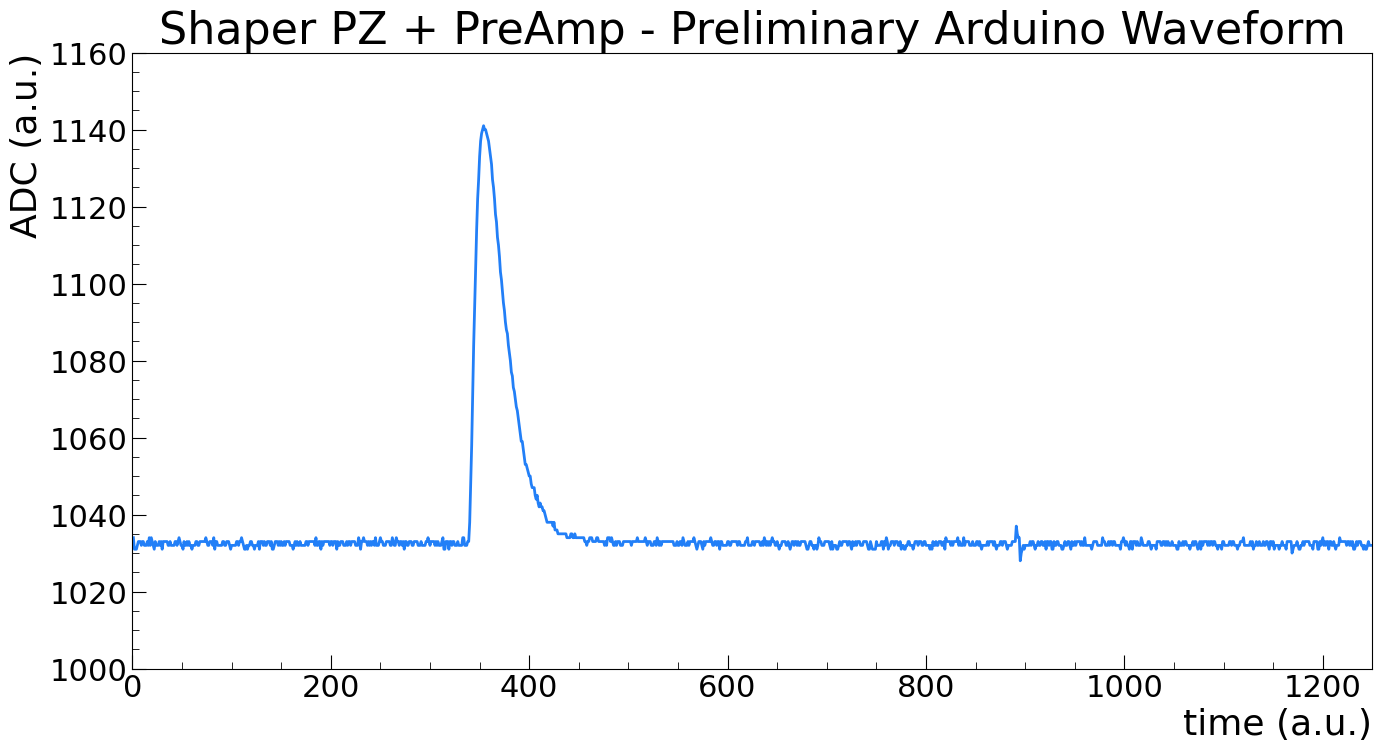

In [15]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time'], data['ADC'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('Shaper PZ + PreAmp - Preliminary Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (a.u.)', fontsize = 26, loc = 'right')
ax1.set_ylabel('ADC (a.u.)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 1250)
ax1.set_ylim(bottom = 1000)

# SAVE FIGURE
#fig.savefig('../Logbook/shaper_PZ_preamp_arduino_waveform.png', dpi = 300, facecolor = 'white')

plt.show()

## Linearità della Catena Elettronica

In [16]:
# READ DATA
file1 = '../Data/Catena/catena_2us_ROOT.dat'
file2 = '../Data/Catena/catena_3us_ROOT.dat'
file3 = '../Data/Catena/catena_4us_ROOT.dat'
file4 = '../Data/Catena/catena_5us_ROOT.dat'
file5 = '../Data/Catena/catena_6us_ROOT.dat'
file6 = '../Data/Catena/catena_7us_ROOT.dat'
file7 = '../Data/Catena/catena_8us_ROOT.dat'
file8 = '../Data/Catena/catena_9us_ROOT.dat'
file9 = '../Data/Catena/catena_10us_ROOT.dat'

data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']

data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']

data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']

data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']

data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']

data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']

data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']

data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']

data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()

max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9])

# COMPUTE CHARGES
Rin = 56564 #Ohm
Vin = 1.018 #Volt

I = Vin / Rin

T1 = 1e-6 * 2  #s
T2 = 1e-6 * 3  #s
T3 = 1e-6 * 4  #s
T4 = 1e-6 * 5  #s
T5 = 1e-6 * 6  #s
T6 = 1e-6 * 7  #s
T7 = 1e-6 * 8  #s
T8 = 1e-6 * 9  #s
T9 = 1e-6 * 10 #s

Q1 = T1 * I * 1e12 #pF
Q2 = T2 * I * 1e12 #pF
Q3 = T3 * I * 1e12 #pF
Q4 = T4 * I * 1e12 #pF
Q5 = T5 * I * 1e12 #pF
Q6 = T6 * I * 1e12 #pF
Q7 = T7 * I * 1e12 #pF
Q8 = T8 * I * 1e12 #pF
Q9 = T9 * I * 1e12 #pF

charge = np.array([Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9])

data = pd.DataFrame({'max_values': list(max_values), 'charge': list(charge)}, columns = ['max_values', 'charge'])
data

,max_values,charge
0,1418,35.994626
1,1728,53.991938
2,2046,71.989251
3,2367,89.986564
4,2688,107.983877
5,3006,125.981189
6,3329,143.978502
7,3654,161.975815
8,3980,179.973128


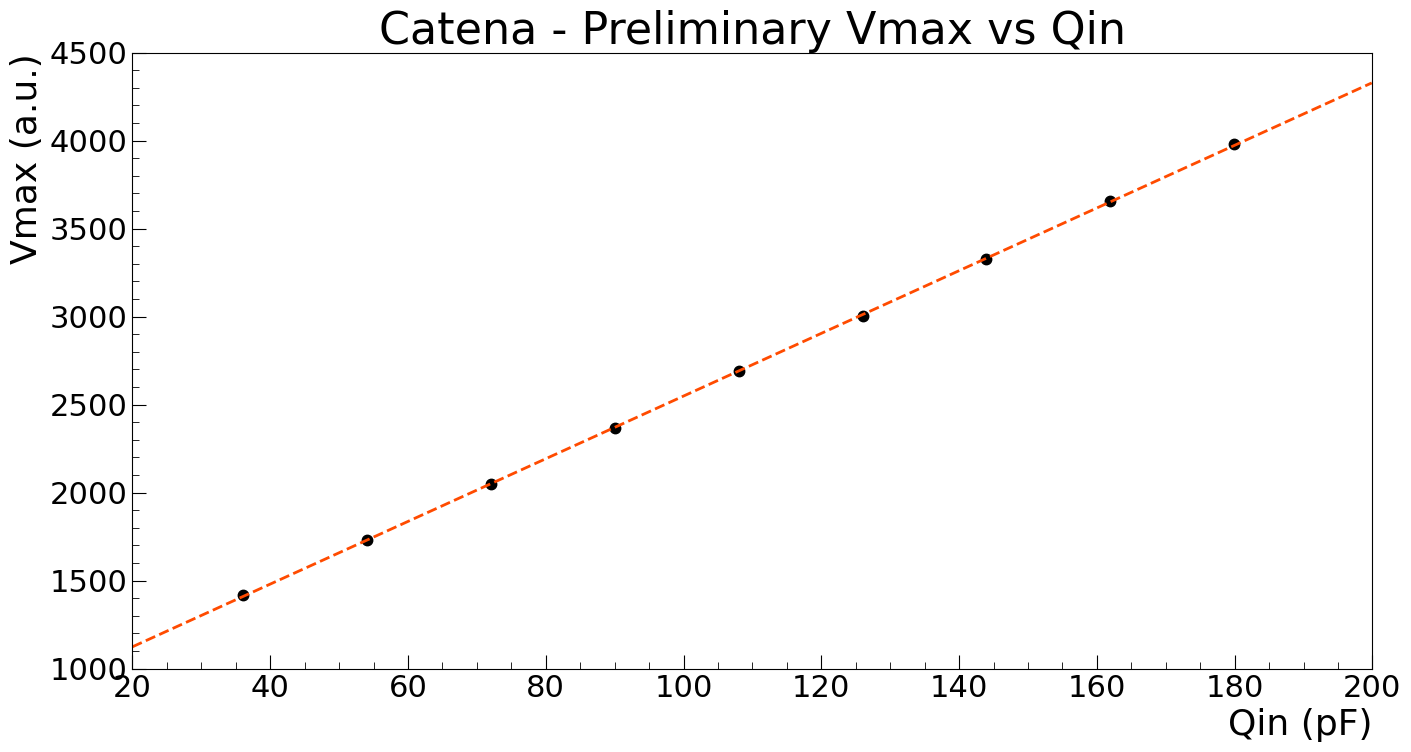

In [17]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data['charge'], ydata = data['max_values'])
func = lin(data['charge'], *par_lin)

# PLOT DATA
ax1.plot(data['charge'], data['max_values'], color = '#000000', linewidth = 0, marker = '.', markersize = 15, label = 'Data')

# PLOT FIT FUNCTION
ax1.plot(np.arange(20, 200, 0.1), lin(np.arange(20, 200, 0.1), *par_lin), color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

# PLOT TITLE
ax1.set_title('Catena - Preliminary Vmax vs Qin', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('Qin (pF)', fontsize = 26, loc = 'right')
ax1.set_ylabel('Vmax (a.u.)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 20, right = 200)
ax1.set_ylim(bottom = 1000, top = 4500)

# SAVE FIGURE
#fig.savefig('../Logbook/catena_linearity.png', dpi = 300, facecolor = 'white')

plt.show()

## Risposta in Frequenza

In [18]:
# READ DATA
file = '../Data/Catena/data_bode.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['f', 'Vin', 'Vout']

T = data['Vout'] / data['Vin']
data['T'] = T

data['f'] = np.log10(data['f'])
data['T'] = 20 * np.log10(data['T'])

data

,f,Vin,Vout,T
1,1.000000,1.02,10.300,20.084741
2,1.698970,1.02,10.300,20.084741
3,2.000000,1.02,10.300,20.084741
4,2.397940,1.02,10.300,20.084741
5,2.698970,1.02,10.300,20.084741
6,3.000000,1.02,10.100,19.914424
7,3.301030,1.02,9.840,19.687899
8,3.477121,1.02,9.360,19.253514
9,3.602060,1.02,8.880,18.796256
10,3.698970,1.02,8.240,18.146541


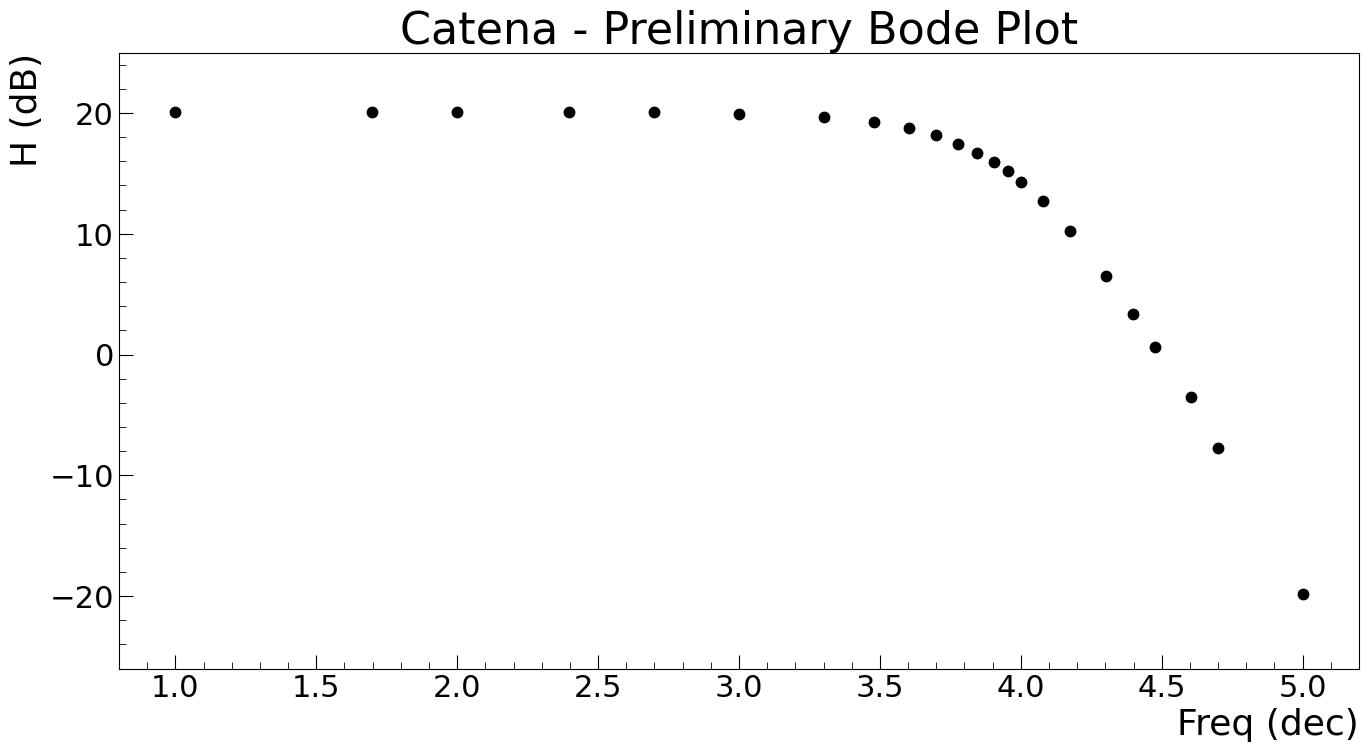

In [19]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['f'], data['T'], color = '#000000', linewidth = 0, marker = '.', markersize = 15, label = 'Data')

# PLOT TITLE
ax1.set_title('Catena - Preliminary Bode Plot', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('Freq (dec)', fontsize = 26, loc = 'right')
ax1.set_ylabel('H (dB)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0.8, right = 5.2)
ax1.set_ylim(bottom = -26, top = 25)

# SAVE FIGURE
#fig.savefig('../Logbook/catena_bode_plot.png', dpi = 300, facecolor = 'white')

plt.show()

## Effetto dello Shaping Time

In [20]:
# READ DATA
file = '../Data/Catena/.dat'

data = pd.read_csv(file, sep = ' ', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']
data

FileNotFoundError: [Errno 2] File ../Data/Catena/.dat does not exist: '../Data/Catena/.dat'

In [24]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time'], data['ADC'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('Shaping Time Effect - Preliminary Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (a.u.)', fontsize = 26, loc = 'right')
ax1.set_ylabel('ADC (a.u.)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2047)
ax1.set_ylim(bottom = 700)

# SAVE FIGURE
#fig.savefig('../Logbook/.png', dpi = 300)

plt.show()

KeyError: 'time'

# Calibrazione Arduino 18

In [34]:
# READ DATA
file_in =  '../Data/PreAmp/calib_in_18.txt'
file_vdiv =  '../Data/PreAmp/calib_in_vdiv_18.txt'
file1 = '../Data/PreAmp/calib_02_18_ROOT.dat'
file2 = '../Data/PreAmp/calib_05_18_ROOT.dat'
file3 = '../Data/PreAmp/calib_08_18_ROOT.dat'
file4 = '../Data/PreAmp/calib_10_18_ROOT.dat'
file5 = '../Data/PreAmp/calib_12_18_ROOT.dat'
file6 = '../Data/PreAmp/calib_15_18_ROOT.dat'
file7 = '../Data/PreAmp/calib_18_18_ROOT.dat'
file8 = '../Data/PreAmp/calib_20_18_ROOT.dat'
file9 = '../Data/PreAmp/calib_21_18_ROOT.dat'
file10 = '../Data/PreAmp/calib_22_18_ROOT.dat'
file11 = '../Data/PreAmp/calib_23_18_ROOT.dat'
file12 = '../Data/PreAmp/calib_24_18_ROOT.dat'
file13 = '../Data/PreAmp/calib_25_18_ROOT.dat'

data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']

data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']

data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']

data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']

data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']

data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']

data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']

data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']

data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']

data10 = pd.read_csv(file10, sep = ' ', index_col = False, header = None)
data10.index = np.arange(1, len(data10)+1)
data10.columns = ['time', 'ADC']

data11 = pd.read_csv(file11, sep = ' ', index_col = False, header = None)
data11.index = np.arange(1, len(data11)+1)
data11.columns = ['time', 'ADC']

data12 = pd.read_csv(file12, sep = ' ', index_col = False, header = None)
data12.index = np.arange(1, len(data12)+1)
data12.columns = ['time', 'ADC']

data13 = pd.read_csv(file13, sep = ' ', index_col = False, header = None)
data13.index = np.arange(1, len(data13)+1)
data13.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()
max10 = data10['ADC'].max()
max11 = data11['ADC'].max()
max12 = data12['ADC'].max()
max13 = data13['ADC'].max()

max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9, max10, max11, max12, max13])

#data_in =  pd.read_csv(file_in, sep = ' ', index_col = False, header = None)
#data_in.index = np.arange(1, len(data_in)+1)
#data_in.columns = ['Vin']
#Vin = data_in.to_numpy()

Vin = np.loadtxt(file_in)

Vdiv = np.loadtxt(file_vdiv)

data = pd.DataFrame({'max_values': list(max_values), 'Vin': list(Vin), 'Vdiv': list(Vdiv)}, columns = ['max_values', 'Vin', 'Vdiv'])
data

,max_values,Vin,Vdiv
0,1019,0.206,0.050
1,1383,0.512,0.100
2,1765,0.824,0.200
3,2019,1.020,0.200
4,2289,1.230,0.200
5,2680,1.540,0.304
6,3080,1.860,0.304
7,3355,2.040,0.352
8,3500,2.150,0.352
9,3636,2.260,0.376


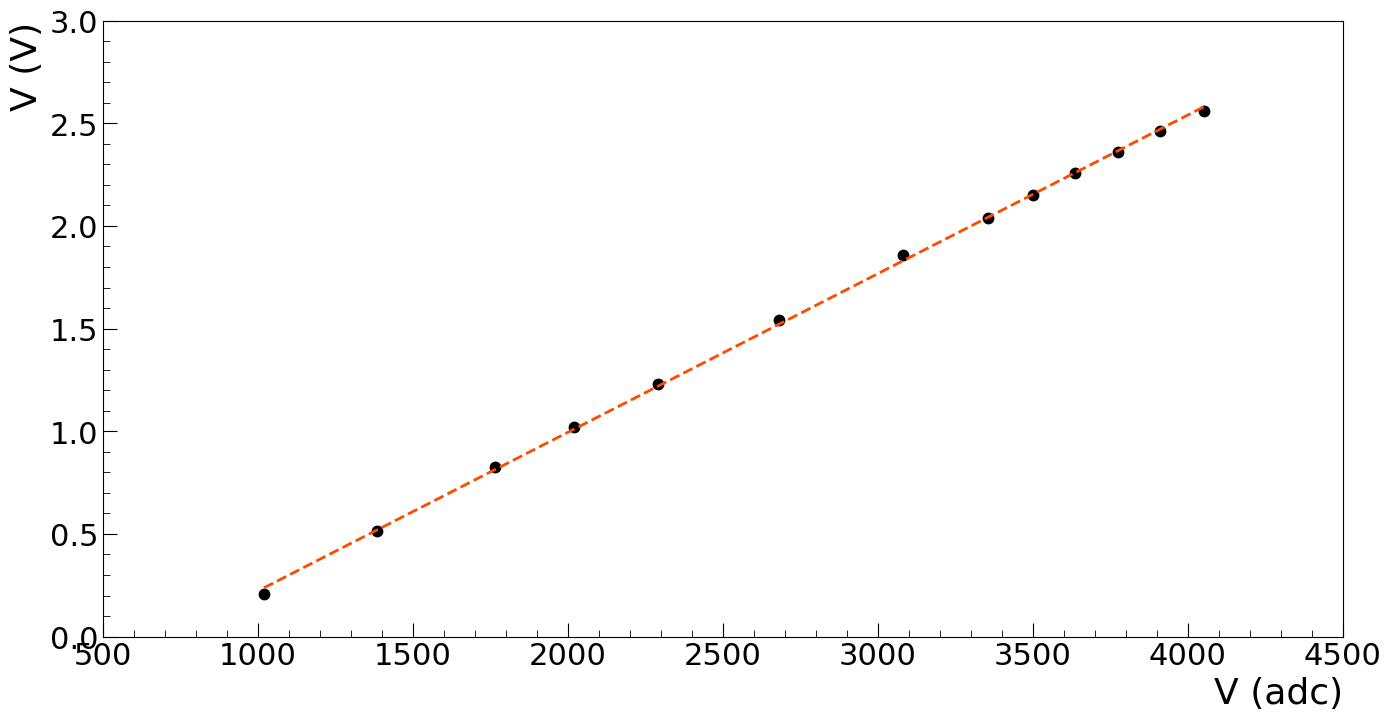

In [30]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data['max_values'], ydata = data['Vin'])
func = lin(data['max_values'], *par_lin)

# PLOT DATA
ax1.plot(data['max_values'], data['Vin'], color = '#000000', linewidth = 0, marker = '.', markersize = 15, label = 'Data')

# PLOT FIT FUNCTION
ax1.plot(data['max_values'], lin(data['max_values'], *par_lin), color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

# PLOT TITLE
#ax1.set_title('Catena - Preliminary Vmax vs Qin', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('V (adc)', fontsize = 26, loc = 'right')
ax1.set_ylabel('V (V)', fontsize = 26, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
#ax1.set_xlim(left = 20, right = 200)
#ax1.set_ylim(bottom = 1000, top = 4500)

# SAVE FIGURE
#fig.savefig('../Logbook/catena_linearity.png', dpi = 300, facecolor = 'white')

plt.show()